# **Carga de las librerías necesarias**

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

**Descarga del dataset desde la web**

In [2]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Grocery_and_Gourmet_Food.json.gz

--2023-08-21 20:53:46--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Grocery_and_Gourmet_Food.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 586910426 (560M) [application/x-gzip]
Saving to: ‘Grocery_and_Gourmet_Food.json.gz’

Grocery_and_Gourmet 100%[===================>] 559.72M  17.9MB/s    in 33s     

2023-08-21 20:54:20 (16.9 MB/s) - ‘Grocery_and_Gourmet_Food.json.gz’ saved [586910426/586910426]



**Se carga la metadata. Para la práctica, se tomarán 100,000 muestras**

In [3]:
# Cargar la metadata
data = []
with gzip.open('Grocery_and_Gourmet_Food.json.gz') as f:
    # Tomar solo las primeras 100,000 filas
    for i, l in enumerate(f):
        data.append(json.loads(l.strip()))
        if i == 99999:  # Detener lectura hasta llegar a 100,000 filas (se empieza a contar con el 0)
            break

print(len(data))

print(data[0])

100000
{'overall': 5.0, 'verified': True, 'reviewTime': '06 4, 2013', 'reviewerID': 'ALP49FBWT4I7V', 'asin': '1888861614', 'reviewerName': 'Lori', 'reviewText': 'Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.', 'summary': 'Love it', 'unixReviewTime': 1370304000}


In [4]:
# Convertir el archivo json en un dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

100000


In [5]:
df.head(5).T

,0,1,2,3,4
overall,5.0,4.0,4.0,5.0,4.0
verified,True,True,True,True,True
reviewTime,"06 4, 2013","05 23, 2014","05 9, 2014","04 20, 2014","04 16, 2014"
reviewerID,ALP49FBWT4I7V,A1KPIZOCLB9FZ8,A2W0FA06IYAYQE,A2PTZTCH2QUYBC,A2VNHGJ59N4Z90
asin,1888861614,1888861614,1888861614,1888861614,1888861614
reviewerName,Lori,BK Shopper,daninethequeen,Tammara,LaQuinta Alexander
reviewText,Very pleased with my purchase. Looks exactly l...,Very nicely crafted but too small. Am going to...,still very pretty and well made...i am super p...,"I got this for our wedding cake, and it was ev...",It was just what I want to put at the top of m...
summary,Love it,Nice but small,"the ""s"" looks like a 5, kina",Would recommend this to a friend!,Topper
unixReviewTime,1370304000,1400803200,1399593600,1397952000,1397606400
vote,NaN,NaN,NaN,NaN,NaN


In [6]:
# Eliminar las filas con valores nulos en la columna "reviewText"
df.dropna(subset=["reviewText"], inplace=True)

**Se crea un nuevo csv con datos balanceados, basados en los datos de la columna 'Overall'**

In [7]:
import pandas as pd

filtered_df = df[df['overall'].isin([1, 2, 3, 4, 5])]

# Obtener la cantidad mínima de overall
min_count = filtered_df['overall'].value_counts().min()
num_samples = min_count

# Obtener la misma cantidad de muestras por cada overall (1, 2, 3, 4, 5)
sampled_df_1 = filtered_df[filtered_df['overall'] == 1].sample(n=num_samples, replace=True)[['overall', 'reviewText']]
sampled_df_2 = filtered_df[filtered_df['overall'] == 2].sample(n=num_samples, replace=True)[['overall', 'reviewText']]
sampled_df_3 = filtered_df[filtered_df['overall'] == 3].sample(n=num_samples, replace=True)[['overall', 'reviewText']]
sampled_df_4 = filtered_df[filtered_df['overall'] == 4].sample(n=num_samples, replace=True)[['overall', 'reviewText']]
sampled_df_5 = filtered_df[filtered_df['overall'] == 5].sample(n=num_samples, replace=True)[['overall', 'reviewText']]

result_df = pd.concat([sampled_df_1, sampled_df_2, sampled_df_3, sampled_df_4, sampled_df_5])

result_df.to_csv('sampled_data_file.csv', index=False)

In [8]:
# Ruta completa al archivo
file_path = '/content/sampled_data_file.csv'

# Carga el archivo CSV en un DataFrame
data_file = pd.read_csv(file_path)

data_file.head(5).T

,0,1,2,3,4
overall,1.0,1.0,1.0,1.0,1.0
reviewText,I'm not sure where to begin. Truth is I'm a bi...,Didn't read the description as well as I shoul...,"Awful, just awful. But Amazon was very good a...",Didn't work,I drink a lot of green tea and was looking for...


In [9]:
# Visualización de la distribución de datos basados en la columna 'Overall'

overall_counts = data_file['overall'].value_counts()

print(overall_counts)

1.0    3581
2.0    3581
3.0    3581
4.0    3581
5.0    3581
Name: overall, dtype: int64


**Se separan las palabras de cada review**

In [10]:
splitted_reviews = data_file['reviewText'].str.lower().str.split()

In [11]:
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)

**Se crea función para hacer el etiquetado de sentimientos en los reviews, donde 1 es un sentimiento negativo, y 0 es un sentimiento positivo**

In [12]:
def label_sentiment(row):
    if int(row['overall']) < 3:
        return 1 # Sentimiento negativo
    else:
        return 0 # Sentimiento positivo

In [13]:
data_file['sentiment_label'] = data_file.apply(lambda row: label_sentiment(row), axis=1)

In [14]:
data_file.head()

,overall,reviewText,sentiment_label
0,1.0,I'm not sure where to begin. Truth is I'm a bi...,1
1,1.0,Didn't read the description as well as I shoul...,1
2,1.0,"Awful, just awful. But Amazon was very good a...",1
3,1.0,Didn't work,1
4,1.0,I drink a lot of green tea and was looking for...,1


In [15]:
# Crear el archivo CSV con el DataFrame actual
data_file.to_csv('data_file.csv', index=False)

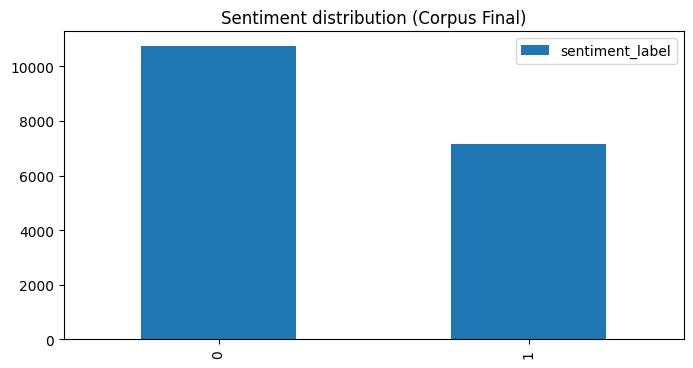

In [16]:
aux_df = pd.DataFrame(data_file['sentiment_label'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

**Visualización de ngrams para ver las palabras más repetidas para posteriormente ser parte de la lista de StopWords**

In [17]:
from nltk import ngrams # Exploración

bigrams_ = ngrams(words, 2)
trigrams_ = ngrams(words, 3)

In [18]:
from nltk.probability import FreqDist # Exploración

bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

In [19]:
bigrams_freq_.most_common(100)

[(('of', 'the'), 2416),
 (('in', 'the'), 2277),
 (('it', 'is'), 1961),
 (('i', 'was'), 1874),
 (('i', 'have'), 1860),
 (('this', 'is'), 1786),
 (('it', 'was'), 1722),
 (('and', 'i'), 1177),
 (('if', 'you'), 1177),
 (('is', 'a'), 1172),
 (('i', 'am'), 1104),
 (('but', 'i'), 1102),
 (('for', 'the'), 1051),
 (('for', 'a'), 1044),
 (('and', 'the'), 1016),
 (('on', 'the'), 999),
 (('to', 'be'), 999),
 (('to', 'the'), 997),
 (('i', 'would'), 968),
 (('in', 'a'), 927),
 (('when', 'i'), 890),
 (('i', 'had'), 877),
 (('and', 'it'), 872),
 (('a', 'little'), 860),
 (('this', 'product'), 840),
 (('is', 'not'), 817),
 (('i', 'will'), 795),
 (('that', 'i'), 786),
 (('so', 'i'), 784),
 (('with', 'the'), 780),
 (('in', 'my'), 739),
 (('i', 'love'), 739),
 (('like', 'the'), 737),
 (('i', "don't"), 734),
 (('this', 'tea'), 720),
 (('but', 'it'), 690),
 (('was', 'a'), 689),
 (('i', 'bought'), 684),
 (('as', 'a'), 669),
 (('is', 'the'), 664),
 (('but', 'the'), 664),
 (('a', 'good'), 656),
 (('they', 'are'

In [20]:
trigrams_freq_.most_common(100)

[(('this', 'is', 'a'), 368),
 (('a', 'lot', 'of'), 327),
 (('this', 'is', 'the'), 277),
 (('i', 'bought', 'this'), 259),
 (('it', 'was', 'a'), 226),
 (('it', 'is', 'a'), 226),
 (('i', 'had', 'to'), 224),
 (('i', 'have', 'been'), 224),
 (('and', 'it', 'was'), 213),
 (('if', 'you', 'are'), 211),
 (('as', 'good', 'as'), 205),
 (('it', 'has', 'a'), 204),
 (('one', 'of', 'the'), 200),
 (('it', 'is', 'not'), 197),
 (('if', 'you', 'like'), 186),
 (('i', "don't", 'know'), 185),
 (('i', 'would', 'not'), 183),
 (('this', 'tea', 'is'), 182),
 (('i', 'have', 'to'), 175),
 (('some', 'of', 'the'), 172),
 (('i', 'did', 'not'), 169),
 (('the', 'taste', 'is'), 167),
 (('the', 'taste', 'of'), 166),
 (('i', 'am', 'not'), 165),
 (('out', 'of', 'the'), 155),
 (('if', 'you', 'want'), 154),
 (('this', 'is', 'not'), 154),
 (('i', 'like', 'the'), 153),
 (('i', 'will', 'not'), 150),
 (('this', 'product', 'is'), 149),
 (('i', 'was', 'looking'), 149),
 (('i', 'love', 'this'), 148),
 (('it', 'would', 'be'), 148),


**Visualización de las palabras más relevantes utilizando Word Cloud**

In [21]:
from wordcloud import WordCloud

In [22]:
import matplotlib.pyplot as plt

max_words = 10 # Máximo de palabras en el Word Cloud

def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=max_words, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

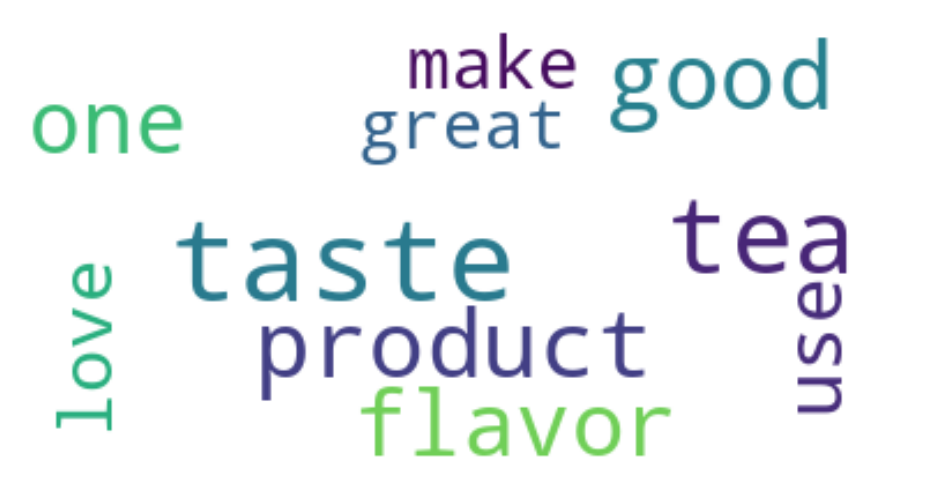

In [23]:
plot_word_cloud(words)

**Utilizando Word2Vec, se visualizan las 10 palabras más cercanas a las que aparecen en el Word Cloud**

In [24]:
#Ejercicio de aplicación con Word2Vec
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

import re  # Para Preprocesamiento
import pandas as pd
from time import time  # Tiempo de las operaciones
from collections import defaultdict  # Para Frecuencias de palabras

import spacy  # Para prepocesamiento
import logging  # Configuración de loggings para monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from gensim.models.phrases import Phrases, Phraser

In [25]:
df = pd.read_csv('/content/sampled_data_file.csv')
df.shape

(17905, 2)

In [26]:
df.head()

,overall,reviewText
0,1.0,I'm not sure where to begin. Truth is I'm a bi...
1,1.0,Didn't read the description as well as I shoul...
2,1.0,"Awful, just awful. But Amazon was very good a..."
3,1.0,Didn't work
4,1.0,I drink a lot of green tea and was looking for...


In [27]:
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [28]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [29]:
nlp = spacy.load("en_core_web_sm")
def cleaning(doc):
    # Lematizamos y removemos stopwords
    # doc necesita ser a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec usa las palabras de contexto para aprender a representar el vector de una palabra ,
    # si una sentencia tiene solo una o dos palabras ,
    # el beneficio para el training es muy pequeño
    if len(txt) > 2:
        return ' '.join(txt)

In [30]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['reviewText'])

In [31]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

print('Tiempo para limpiar todo: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para limpiar todo: 1.51 mins


In [32]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(12459, 1)

In [33]:
df_clean.to_csv('./df_clean.csv')

In [34]:
import multiprocessing

from gensim.models import Word2Vec

In [35]:
cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

2


In [36]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [37]:
t = time()
sent = [row.split() for row in df_clean['clean']]
w2v_model.build_vocab(sent, progress_per=10000)

print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para construir el vocabulario: 0.0 mins


In [38]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))

Vocabulario compuesto por 1618 palabras


In [39]:
t = time()

w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.23 mins


In [40]:
w2v_model.save('./w2v_model.pkl')

In [41]:
# Obtener las palabras en el vocabulario
vocab_words = w2v_model.wv.index_to_key

# Obtener las primeras 10 palabras del vocabulario
first_10_words = vocab_words[:10]

print('Vocabulario compuesto por {} palabras'.format(len(vocab_words)))
print('Primeras 10 palabras en el vocabulario:', first_10_words)

Vocabulario compuesto por 1618 palabras
Primeras 10 palabras en el vocabulario: ['taste', 'tea', 'like', 'good', 'flavor', 'product', 'buy', 'great', 'try', 'coffee']


In [42]:
w2v_model.wv.most_similar(positive=["taste"])

[('weird', 0.897494912147522),
 ('like', 0.8849587440490723),
 ('tasting', 0.8627856373786926),
 ('fake', 0.8625025153160095),
 ('strange', 0.8587151169776917),
 ('unlike', 0.8581064343452454),
 ('odd', 0.8571665287017822),
 ('overly', 0.8542379140853882),
 ('kind', 0.8521733283996582),
 ('grainy', 0.8502684235572815)]

In [43]:
w2v_model.wv.most_similar(positive=["tea"])

[('lipton', 0.9131957292556763),
 ('iced', 0.907830536365509),
 ('peppermint', 0.8916898965835571),
 ('caffeinate', 0.8757825493812561),
 ('afternoon', 0.8752864599227905),
 ('awake', 0.8744349479675293),
 ('stash', 0.8682447075843811),
 ('republic', 0.8676424026489258),
 ('chamomile', 0.8641694784164429),
 ('calm', 0.860588788986206)]

In [44]:
w2v_model.wv.most_similar(positive=["good"])

[('excellent', 0.8940829038619995),
 ('overall', 0.8915145397186279),
 ('great', 0.8834468722343445),
 ('pretty', 0.8817105889320374),
 ('tasty', 0.8775334358215332),
 ('usually', 0.8632782101631165),
 ('pricey', 0.862849771976471),
 ('outstanding', 0.8590061068534851),
 ('okay', 0.8515073657035828),
 ('especially', 0.8466700315475464)]

In [45]:
w2v_model.wv.most_similar(positive=["like"])

[('kind', 0.9039441347122192),
 ('slightly', 0.8884093761444092),
 ('weird', 0.8865618109703064),
 ('taste', 0.8849587440490723),
 ('unlike', 0.8829313516616821),
 ('remind', 0.8808635473251343),
 ('odd', 0.8801574110984802),
 ('grainy', 0.8744571208953857),
 ('overly', 0.8712977170944214),
 ('yuck', 0.8678699731826782)]

In [46]:
w2v_model.wv.most_similar(positive=["flavor"])

[('overpower', 0.9343419671058655),
 ('unique', 0.9326549172401428),
 ('slight', 0.9304832816123962),
 ('subtle', 0.9213457703590393),
 ('fruity', 0.9190925359725952),
 ('overwhelming', 0.9180694222450256),
 ('somewhat', 0.9160376191139221),
 ('hint', 0.9096971154212952),
 ('citrus', 0.9085027575492859),
 ('palate', 0.9049643278121948)]

In [48]:
w2v_sg = Word2Vec.load('./w2v_model.pkl')

In [49]:
keys = ['taste','product','flavor'] # Palabras que se usarán para crear los clusters

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [50]:
print(word_clusters)

[['weird', 'like', 'tasting', 'fake', 'strange', 'unlike', 'odd', 'overly', 'kind', 'grainy'], ['specific', 'rating', 'warning', 'act', 'consumer', 'state', 'necessary', 'learn', 'beware', 'manufacture'], ['overpower', 'unique', 'slight', 'subtle', 'fruity', 'overwhelming', 'somewhat', 'hint', 'citrus', 'palate']]


**Reducción de la dimensionalidad a 2D**

In [52]:
from sklearn.manifold import TSNE

tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [54]:
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [55]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

**Visualización de los clusters**

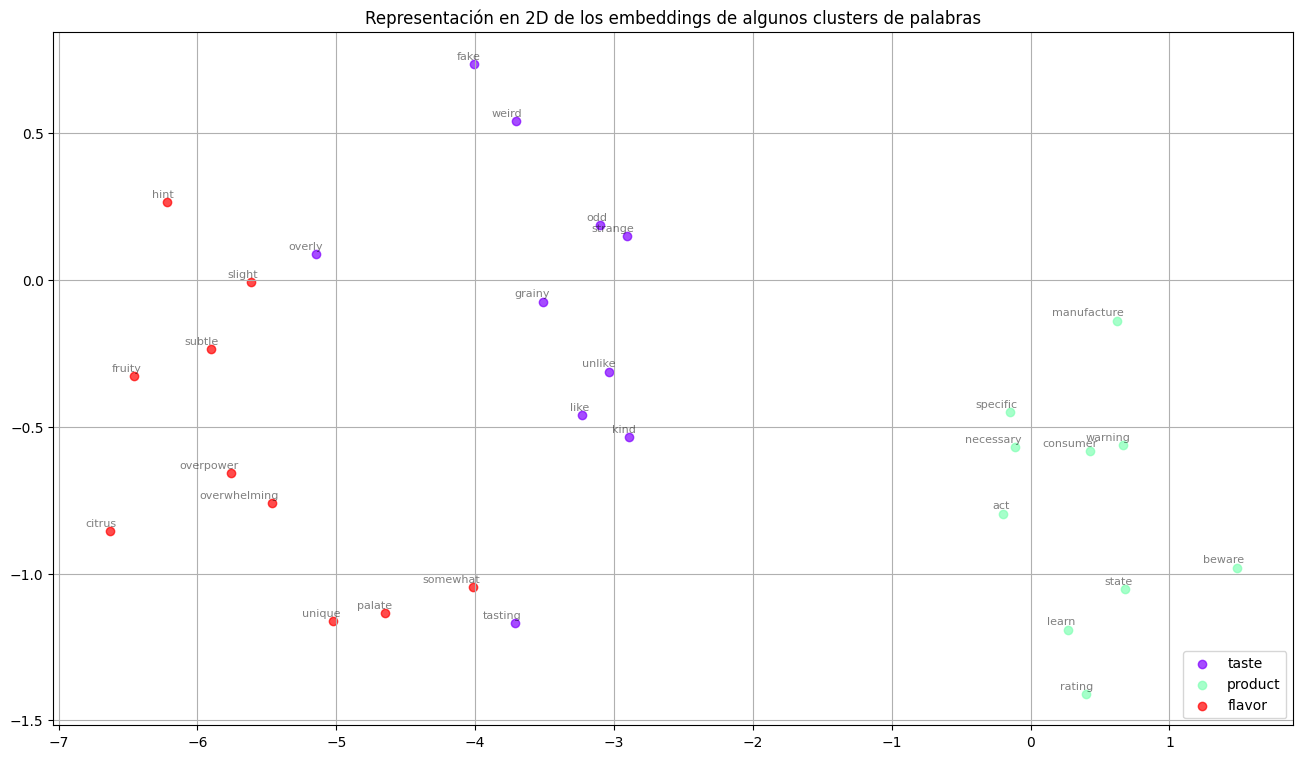

In [56]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

# **Conclusiones de la exploración**

Con los comentarios explorados, se observa una inclinación a palabras positivas como 'Good' y 'Great'. También hay tendencias hacia productos relacionados con bebidas como 'Tea' y 'Coffee'.

En cuanto a los clusters de palabras, parece que el cluster 'Taste' tiene mayor tendencia a palabras negativas, como 'Fake', 'Weird' y 'Odd'. El cluster 'Flavor' parece tener mayor tendencia a palabras positivas, como 'sutle', 'fruity', 'slight'.